In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import h5py
import os
import cv2 as cv
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter, MovieWriter

In [2]:
# read ommatidia coordinates
elevr1 = h5py.File('retina_elev.h5', 'r')['array']
print(elevr1)
azim1 = h5py.File('retina_azim.h5', 'r')['array']
r1 = 1
y1 = -r1 * np.cos(elevr1) * np.sin(azim1)
x1 = -r1 * np.cos(elevr1) * np.cos(azim1)
z1 = r1 * np.sin(elevr1)
print(f'x1 is of shape{np.shape(x1)}')

# read screen coordinates
elevr2 = h5py.File('grid_dima.h5', 'r')['array']
print(np.shape(elevr2))
azim2 = h5py.File('grid_dimb.h5', 'r')['array']
r2 = 10
y2 = -r2 * np.cos(elevr2) * np.sin(azim2)
x2 = -r2 * np.cos(elevr2) * np.cos(azim2)
z2 = r2 * np.sin(elevr2)
print(f'x2 is of shape{np.shape(x2)}')

<HDF5 dataset "array": shape (611,), type "<f8">
x1 is of shape(611,)
(800, 50)
x2 is of shape(800, 50)


In [3]:
inputs = h5py.File('retina_input.h5', 'r')['photon']['data']
inputs = np.array(inputs)
print('the origin input has shape of {}'.format(np.shape(inputs)))
#print(367 * 6)
#print(type(inputs))
inputs = inputs[::10, :]
outputs = h5py.File('retina_output0.h5', 'r')['V']['data']
outputs = np.array(outputs)
print('the origin output has shape of {}'.format(np.shape(outputs)))
outputs = outputs[::10, :]

R1_inputs = inputs[:, 0:-1:6]
R1_outputs = outputs[:, 0:-1:6]
#print(R1_outputs)
#print(type(R1_inputs))
#print(type(R1_outputs))

screen = h5py.File('intensities.h5', 'r')['array']
print(np.shape(screen))

print(f'the cutted input has the shape {np.shape(inputs)}')
print(f'the R1 input has the shape {np.shape(R1_inputs)}')
print(f'the R1 output has the shape {np.shape(R1_outputs)}')
#plt.matshow(R1_outputs)
#plt.show()

the origin input has shape of (2000, 3666)
the origin output has shape of (2000, 3666)
(200, 800, 50)
the cutted input has the shape (200, 3666)
the R1 input has the shape (200, 611)
the R1 output has the shape (200, 611)


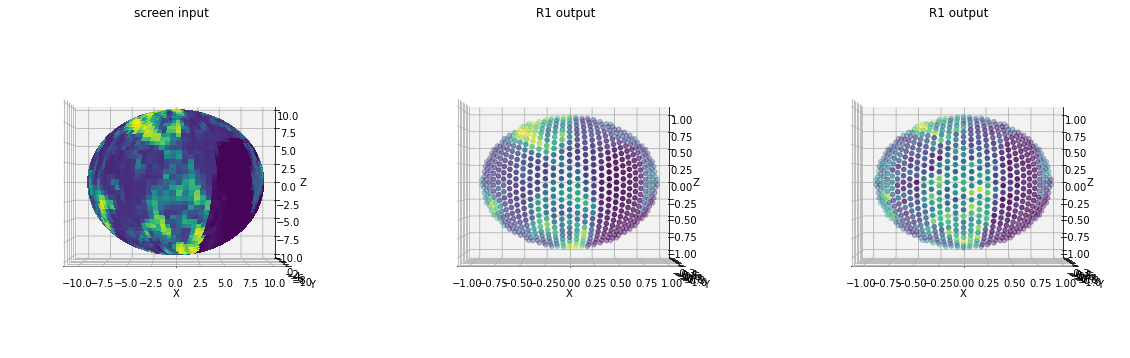

In [4]:
# show screen input, R1 input, R1 output in the same time
%matplotlib inline
frame_number = 1000
frame_number_R = int(frame_number/10)
frame_number_screen = int(frame_number/10)

fig = plt.figure(figsize=(20, 20))
ax_screen_input = fig.add_subplot(1, 3, 1, projection='3d')
#ax = Axes3D(fig)
C = screen[frame_number_screen,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# Plot the surface.
surf = ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='gray',
                       linewidth=0, antialiased=False)
#ax_screen_input.scatter3D(x2, y2, z2, c= C_colored)
ax_screen_input.set_xlabel('X')
ax_screen_input.set_ylabel('Y')
ax_screen_input.set_zlabel('Z')
ax_screen_input.set_title('screen input')
ax_screen_input.view_init(azim=-90,  elev=0)

ax_R1_input = fig.add_subplot(1, 3, 2, projection='3d')
#print(np.shape(R1_inputs[90, :]))
ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[frame_number_R, :])
#ax_R1_input.plot_surface(x1, y1,z1, facecolors=R1_inputs[frame_number_R, :])
ax_R1_input.set_xlabel('X')
ax_R1_input.set_ylabel('Y')
ax_R1_input.set_zlabel('Z')
ax_R1_input.set_title('R1 output')
ax_R1_input.view_init(azim=-90,  elev=0)

ax_R1_output = fig.add_subplot(1, 3, 3, projection='3d')
#print(np.shape(R1_inputs[90, :]))
ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[frame_number_R, :])
ax_R1_output.set_xlabel('X')
ax_R1_output.set_ylabel('Y')
ax_R1_output.set_zlabel('Z')
ax_R1_output.set_title('R1 output')
ax_R1_output.view_init(azim=-90,  elev=0)


plt.show()

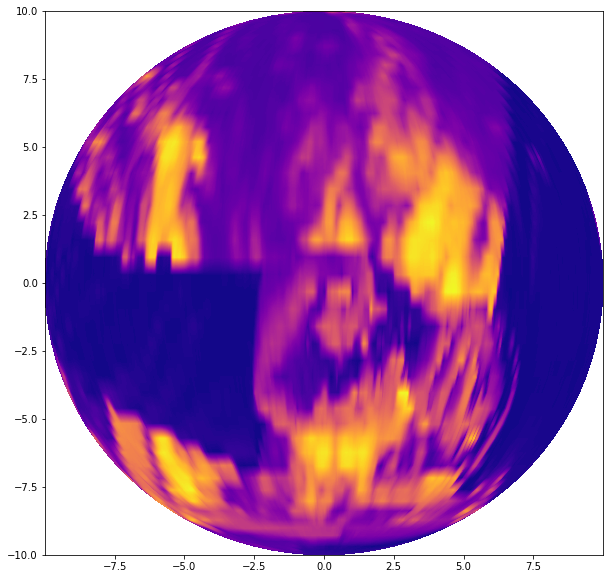

In [31]:
# test 2d surface plot for screen
%matplotlib inline
frame_number = 0
frame_number_R = int(frame_number/10)
frame_number_screen = int(frame_number/10)


x2_reshape = x2.reshape(-1, 1)
y2_reshape = y2.reshape(-1, 1)
z2_reshape = z2.reshape(-1, 1)

fig = plt.figure(figsize=(10, 10))
ax_screen_input = fig.add_subplot(1, 1, 1)
#ax = Axes3D(fig)
C = screen[frame_number_screen,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
ax_screen_input.contourf(x2,z2, C, cmap='plasma', levels=200)
'''
# Plot the surface.
surf = ax_screen_input.contourf(x2, y2, z2, facecolors= C_colored, cmap='gray',
                       linewidth=0, antialiased=False)
#ax_screen_input.scatter3D(x2, y2, z2, c= C_colored)
ax_screen_input.set_xlabel('X')
ax_screen_input.set_ylabel('Y')
ax_screen_input.set_zlabel('Z')
ax_screen_input.set_title('screen input')
ax_screen_input.view_init(azim=-90,  elev=0)
'''

plt.show()

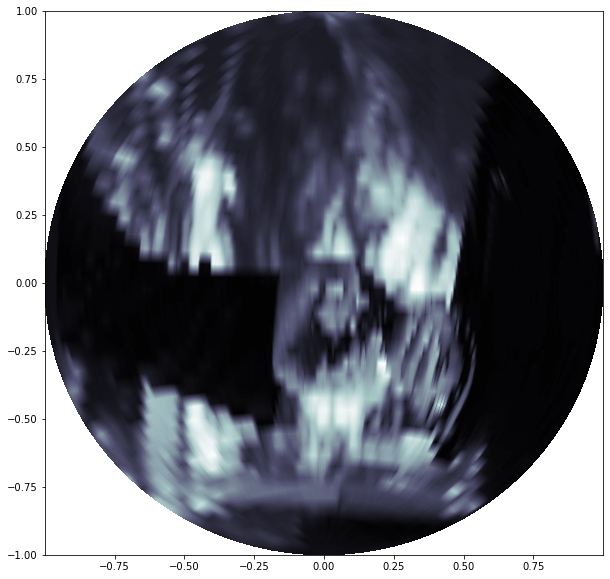

In [62]:
# show screen input but do the albers projection

def cartisian_to_sphere(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y,x)
    phi = np.arccos(z/r)
    return r, theta, phi

def albers(theta, phi):
    
    x = np.sign(np.cos(theta)) * np.sqrt((1-np.cos(phi))/(1 + np.tan(theta)**2))
    y =  x * np.tan(theta)
    return x, y

def albers_projection_cartisian(x, y, z):
    r, theta, phi = cartisian_to_sphere(x2, z2,-y2)
    x_albers, y_albers = albers(theta, phi)
    return x_albers, y_albers

x_albers, y_albers = albers_projection_cartisian(x2, y2, z2)


fig = plt.figure(figsize=(10, 10))
ax_wasabi = fig.add_subplot(1, 1, 1)



ax_wasabi.contourf(x_albers, y_albers, C, cmap='bone', levels=200)

plt.show()

(800, 50)
(800, 50)
theta range is 3.10953558569602 ~ -3.10953558569602
phi range is 1.5707963267948966 ~ 0.03211727336665877


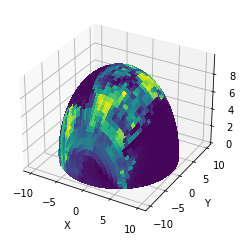

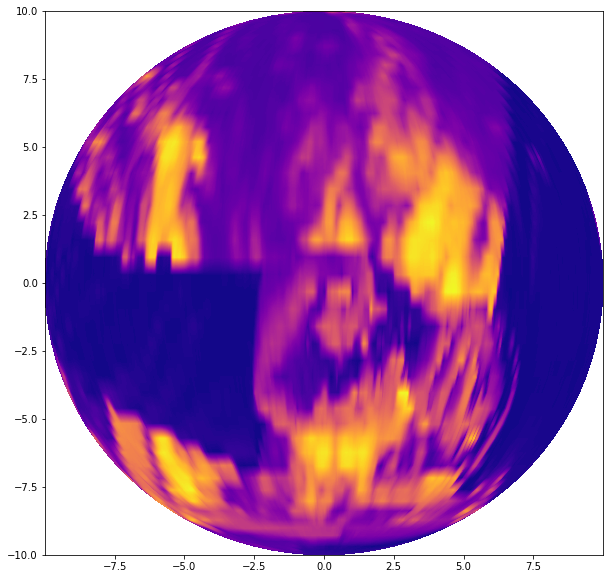

/apps/miniconda/envs/ffbo/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'level'
/apps/miniconda/envs/ffbo/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'level'


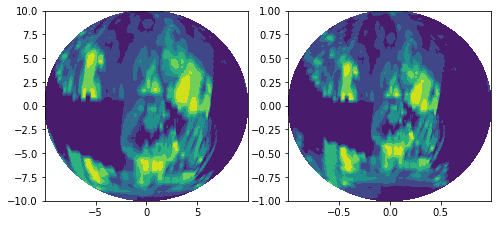

In [49]:
def cartisian_to_sphere(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y,x)
    phi = np.arccos(z/r)
    return r, theta, phi

#r, theta, phi = cartisian_to_sphere(x1, y1,z1)
r, theta, phi = cartisian_to_sphere(x2, z2,-y2)
print(np.shape(r))
print(np.shape(phi))
print(f'theta range is {np.max(theta)} ~ { np.min(theta)}')
print(f'phi range is {np.max(phi)} ~ {np.min(phi)}')

frame_number = 50
X = r * np.sin(phi) * np.cos(theta)
Y = r * np.sin(phi) * np.sin(theta)
Z = r * np.cos(phi)
fig = plt.figure()
ax = fig.add_subplot(1,1, 1, projection = '3d')
C = screen[frame_number_screen,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# Plot the surface.
ax.plot_surface(X, Y, Z, facecolors= C_colored, cmap='gray',
                       linewidth=0, antialiased=False)
#print(np.sin(phi))
#plot = ax.scatter(x1, y1, z1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


fig = plt.figure(figsize=(10, 10))
ax_keke = fig.add_subplot(1, 1, 1)
ax_keke.contourf(X,Y,C, cmap='plasma', levels=200)
plt.show()

def albers(theta, phi):
    
    x = np.sign(np.cos(theta)) * np.sqrt((1-np.cos(phi))/(1 + np.tan(theta)**2))
    y =  x * np.tan(theta)
    return x, y

x_hexa, y_hexa = albers(theta, phi)


fig = plt.figure(figsize=(8, 3.5))
ax_R1_square = fig.add_subplot(1, 2, 2)
ax_R1_output = fig.add_subplot(1, 2, 1)

cut_num = 30
ax_R1_square.contourf(x_hexa, y_hexa, C, level=200)
ax_R1_output.contourf(X, Y, C, level=200)
plt.show()

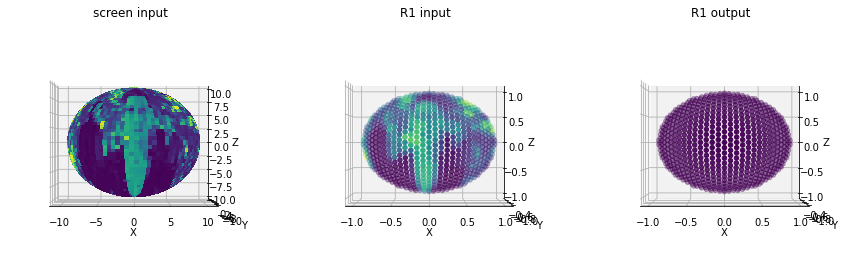

now is 0th frame
now is 0th frame


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1080x1080', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'dear_all.mp4']' returned non-zero exit status 255.

In [5]:
# now try to write 3 mp4 at the same time
def update_plot(frame_number, screen, R1_inputs, R1_outputs, plot):
    if frame_number%50 == 0:
        print(f'now is {frame_number}th frame')
    plot[0].remove()
    C = screen[frame_number,:, :]
    scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
    C_colored = scalarMap.to_rgba(C)
    plot[0] = ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False)
    plot[1] = ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[frame_number, :])
    plot[2] = ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[frame_number, :])
    
    
fig = plt.figure(figsize=(15, 15))
# screen input
ax_screen_input = fig.add_subplot(1, 3, 1, projection='3d')
C = screen[0,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# R1 input & output
ax_R1_input = fig.add_subplot(1, 3, 2, projection='3d')
ax_R1_output = fig.add_subplot(1, 3, 3, projection='3d')

plot = [ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False),
       ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[0, :]),
       ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[0, :])]

ax_screen_input.set_xlabel('X')
ax_screen_input.set_ylabel('Y')
ax_screen_input.set_zlabel('Z')
ax_screen_input.set_title('screen input')
ax_screen_input.view_init(azim=-90,  elev=0)
ax_R1_input.set_xlabel('X')
ax_R1_input.set_ylabel('Y')
ax_R1_input.set_zlabel('Z')
ax_R1_input.set_title('R1 input')
ax_R1_input.view_init(azim=-90,  elev=0)
ax_R1_output.set_xlabel('X')
ax_R1_output.set_ylabel('Y')
ax_R1_output.set_zlabel('Z')
ax_R1_output.set_title('R1 output')
ax_R1_output.view_init(azim=-90,  elev=0)


fps = 10
frn = np.shape(R1_inputs)[0]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen,R1_inputs, R1_outputs, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('dear_all.mp4', writer=Writer(fps=10))
#ani.save('dear_all.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow

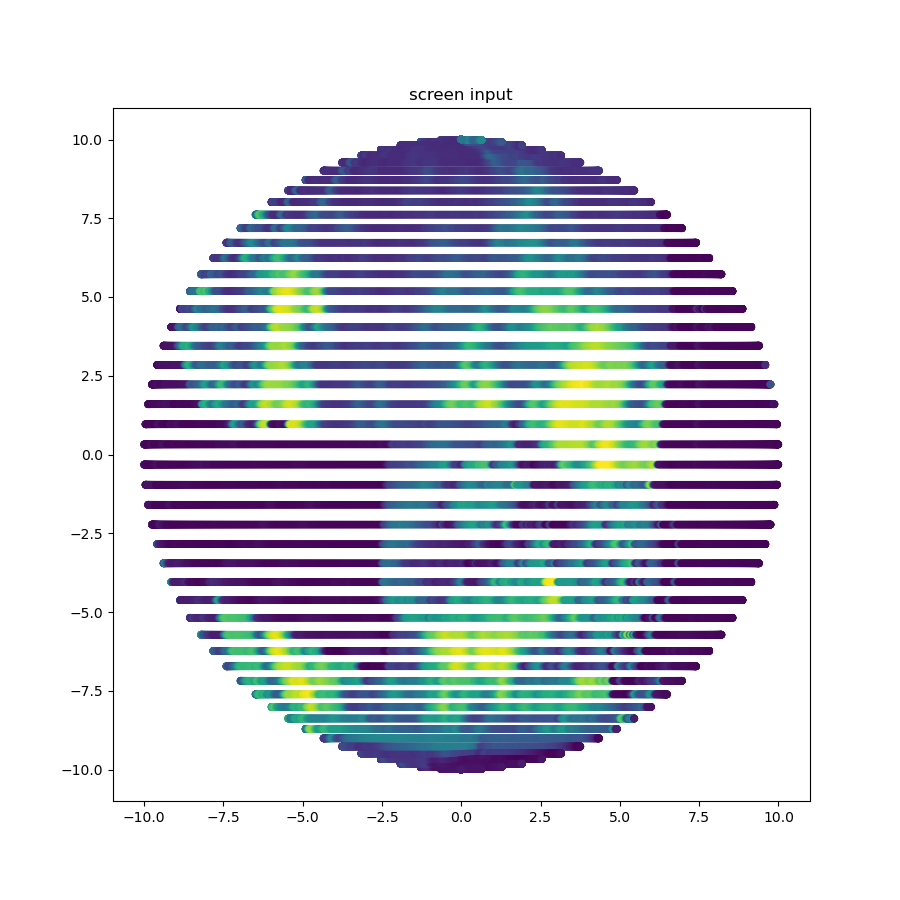

now is 0th frame
now is 0th frame
now is 50th frame
now is 100th frame
now is 150th frame


In [5]:
# I only want screen!!!
def update_plot(frame_number, screen, R1_inputs, R1_outputs, plot):
    if frame_number%50 == 0:
        print(f'now is {frame_number}th frame')
        
    plot[0].remove()
    
    plot[0] = ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[frame_number, :, :].reshape(-1, 1), s=20 )
    
    


x2_reshape = x2.reshape(-1, 1)
z2_reshape = z2.reshape(-1, 1)
    
fig = plt.figure(figsize=(9, 9))
ax_screen_input = fig.add_subplot(1, 1, 1)




plot = [ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[0, :, :].reshape(-1, 1), s=20 )]

ax_screen_input.set_title('screen input')



fps = 10
frn = np.shape(R1_inputs)[0]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen,R1_inputs, R1_outputs, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('screen_is_all.mp4', writer=Writer(fps=fps))
#ani.save('dear_all.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow

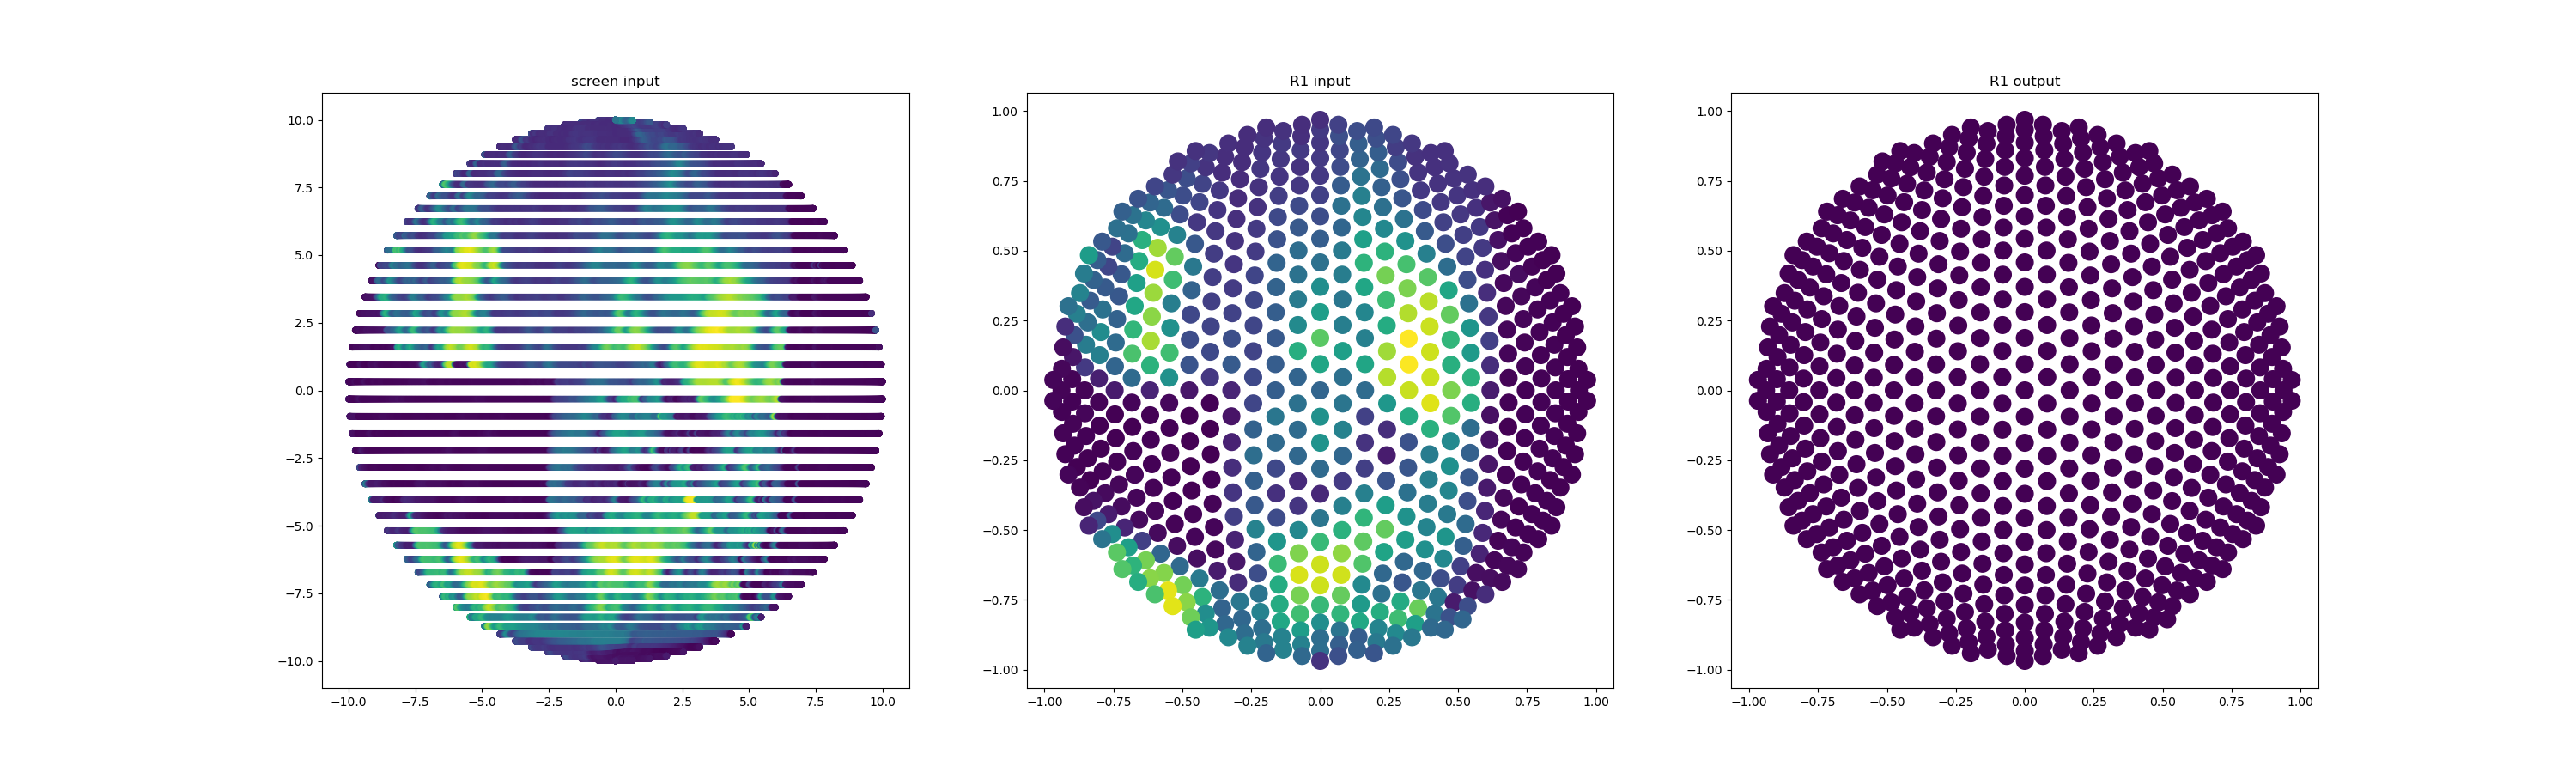

now is 0th frame
now is 0th frame
now is 50th frame
now is 100th frame
now is 150th frame


In [14]:
# compare R1 input and output
def update_plot(frame_number, screen, R1_inputs, R1_outputs, plot):
    if frame_number%50 == 0:
        print(f'now is {frame_number}th frame')
        
    plot[0].remove()
    plot[1].remove()
    plot[2].remove()
    #C = screen[frame_number,:, :]
    #scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
    #C_colored = scalarMap.to_rgba(C)
    plot[0] = ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[frame_number, :, :].reshape(-1, 1), s=20 )
    plot[1] = ax_R1_input.scatter(x1,z1, c=R1_inputs[frame_number, :], s=200)
    plot[2] = ax_R1_output.scatter(x1,z1, c=R1_outputs[frame_number, :], s=200)
    


x2_reshape = x2.reshape(-1, 1)
z2_reshape = z2.reshape(-1, 1)
    
fig = plt.figure(figsize=(30, 9))
ax_screen_input = fig.add_subplot(1, 3, 1)
'''
C = screen[0,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
'''
ax_R1_input = fig.add_subplot(1, 3, 2 )
ax_R1_output = fig.add_subplot(1, 3, 3)



plot = [ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[0, :, :].reshape(-1, 1), s=20 ),
       ax_R1_input.scatter(x1,z1, c=R1_inputs[0, :], s=200),
       ax_R1_output.scatter(x1, z1, c=R1_outputs[0, :], s=200)]
#plot = [ax_R1_input.scatter(x1,z1, c=R1_inputs[0, :], s=100),
#       ax_R1_output.scatter(x1,z1, c=R1_outputs[0, :], s=100)]

ax_screen_input.set_title('screen input')
ax_R1_input.set_title('R1 input')
ax_R1_output.set_title('R1 output')


fps = 10
frn = np.shape(R1_inputs)[0]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen,R1_inputs, R1_outputs, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('R1_IO_2d.mp4', writer=Writer(fps=10))
#ani.save('dear_all.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow

In [ ]:
# maybe use opencv will make it faster somehow


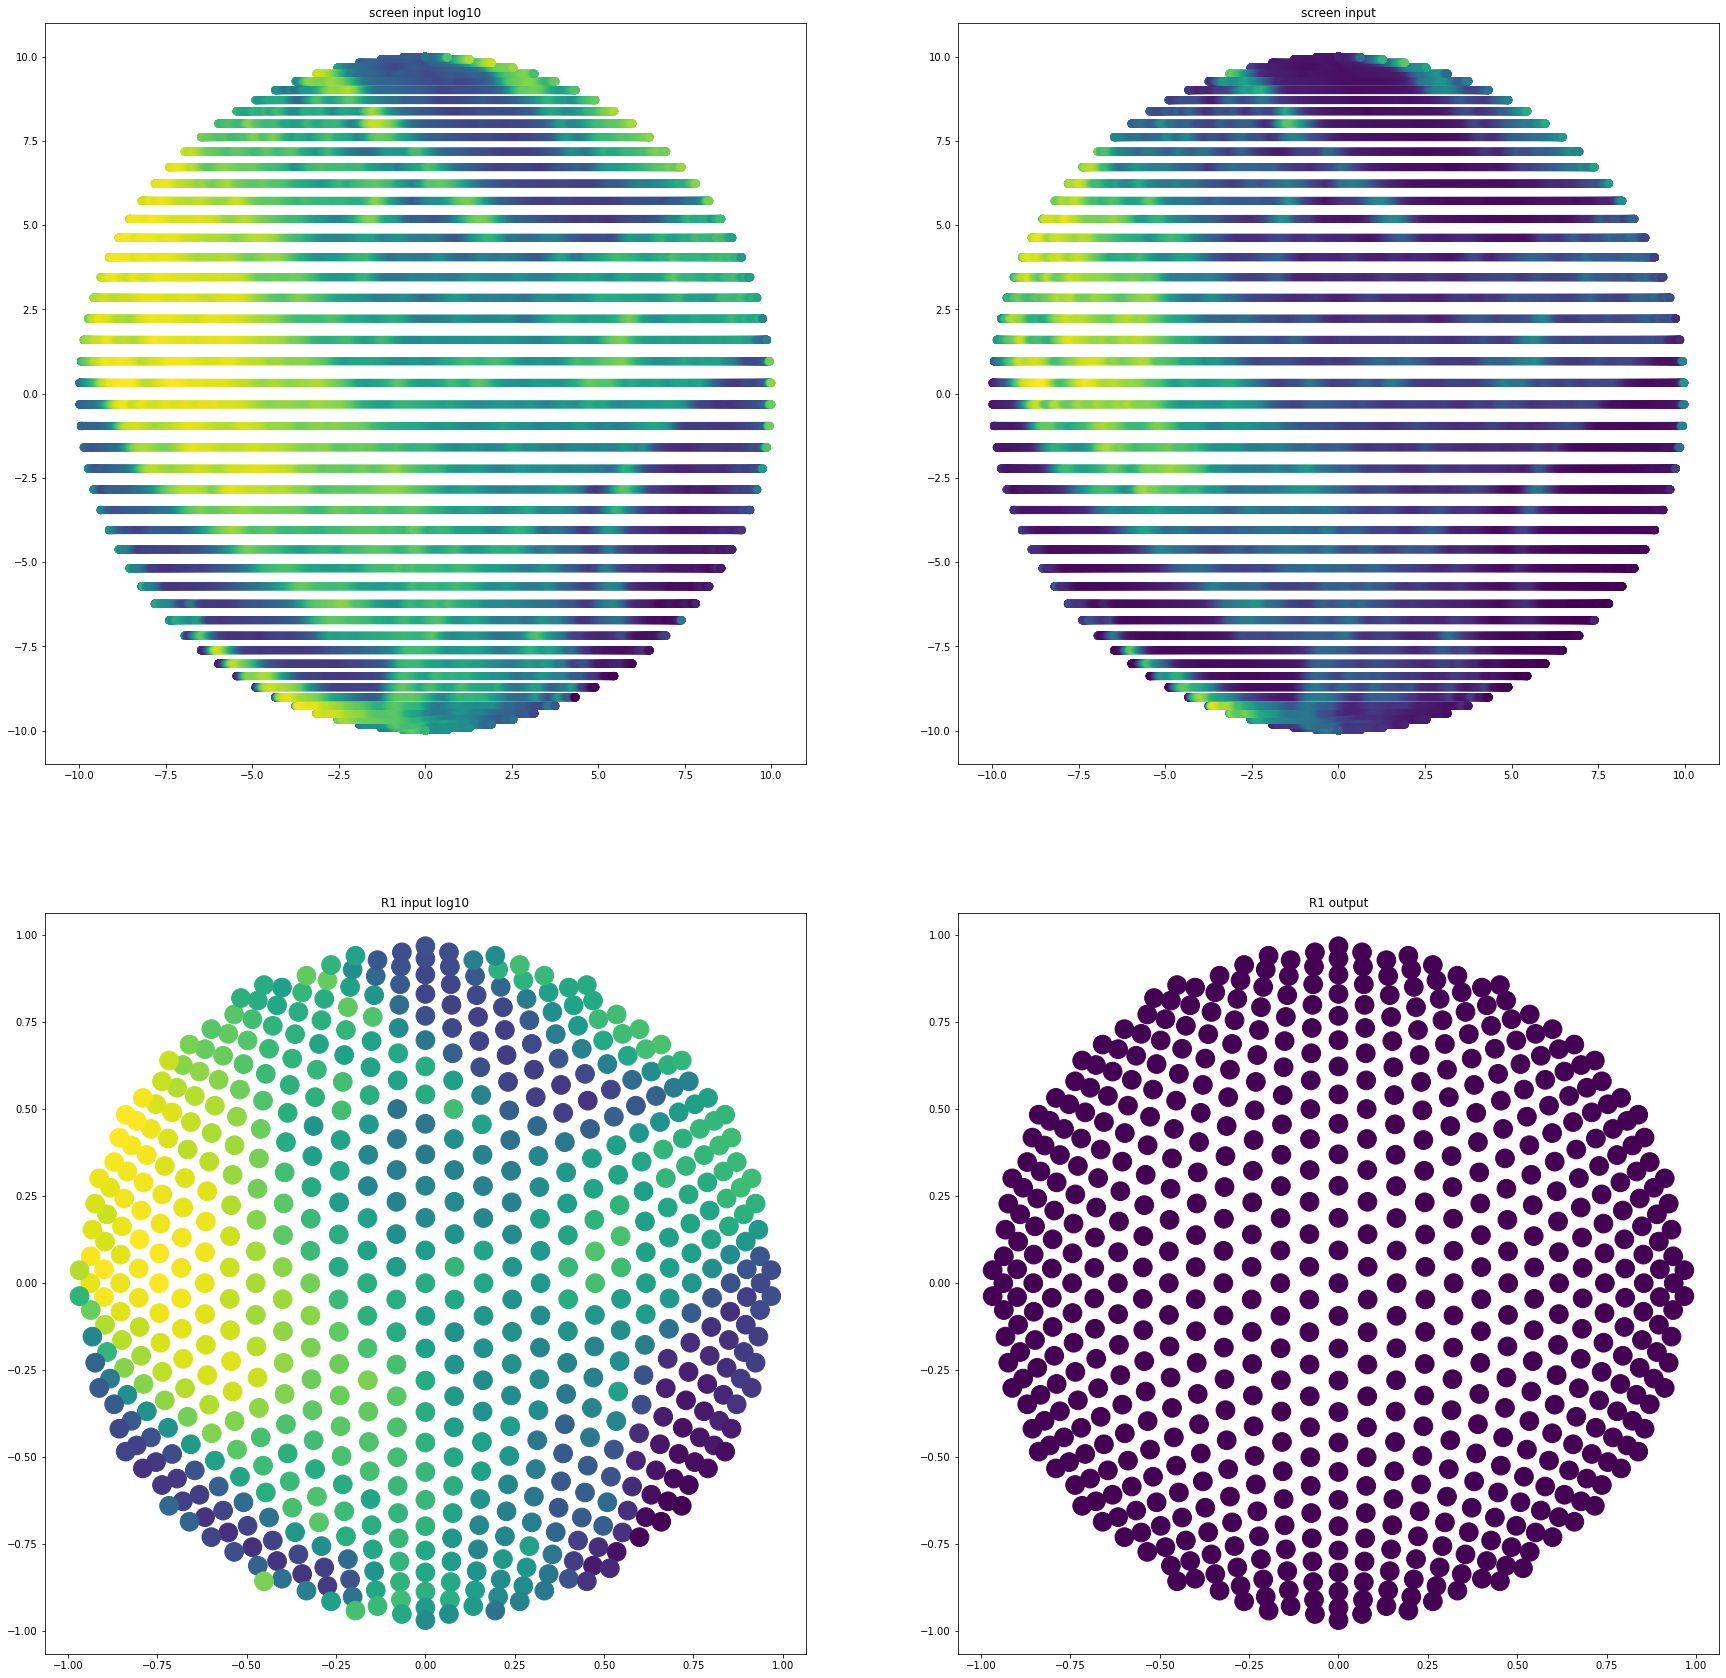

now is 0th frame
now is 0th frame
now is 50th frame
now is 100th frame
now is 150th frame
now is 200th frame
now is 250th frame
now is 300th frame
now is 350th frame


In [7]:
# IO but logged one
%matplotlib inline
def update_plot(frame_number, screen, R1_inputs, R1_inputs_log, R1_outputs, plot):
    if frame_number%50 == 0:
        print(f'now is {frame_number}th frame')
        
    plot[0].remove()
    plot[1].remove()
    plot[2].remove()
    plot[3].remove()
    #C = screen[frame_number,:, :]
    #scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
    #C_colored = scalarMap.to_rgba(C)
    plot[0] = ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[frame_number, :, :].reshape(-1, 1), s=50 )
    plot[1] = ax_screen_input_log.scatter(x2_reshape,z2_reshape, c=screen_log[frame_number, :, :].reshape(-1, 1), s=50 )
    plot[2] = ax_R1_input_log.scatter(x1,z1, c=R1_inputs_log[frame_number, :], s=350)
    plot[3] = ax_R1_output.scatter(x1,z1, c=R1_outputs[frame_number, :], s=350)
    


x2_reshape = x2.reshape(-1, 1)
z2_reshape = z2.reshape(-1, 1)
R1_inputs_log = np.log10(R1_inputs)
screen_log = np.log10(screen)
    
fig = plt.figure(figsize=(30, 30))
ax_screen_input = fig.add_subplot(2, 2, 2)
'''
C = screen[0,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
'''
ax_screen_input_log = fig.add_subplot(2, 2, 1 )
ax_R1_input_log = fig.add_subplot(2, 2, 3)
ax_R1_output = fig.add_subplot(2, 2, 4)



plot = [ax_screen_input.scatter(x2_reshape,z2_reshape, c=screen[0, :, :].reshape(-1, 1), s=50 ),
       ax_screen_input_log.scatter(x2_reshape,z2_reshape, c=screen_log[0, :, :].reshape(-1, 1), s=50 ),
       ax_R1_input_log.scatter(x1,z1, c=R1_inputs_log[0, :], s=350),
       ax_R1_output.scatter(x1, z1, c=R1_outputs[0, :], s=350)]
#plot = [ax_R1_input.scatter(x1,z1, c=R1_inputs[0, :], s=100),
#       ax_R1_output.scatter(x1,z1, c=R1_outputs[0, :], s=100)]

ax_screen_input.set_title('screen input')
ax_screen_input_log.set_title('screen input log10')
ax_R1_input_log.set_title('R1 input log10')
ax_R1_output.set_title('R1 output')


fps = 20
frn = np.shape(R1_inputs)[0]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen,R1_inputs, R1_inputs_log, R1_outputs, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('R1_IO_2d_log_speed1000.mp4', writer=Writer(fps=20))
#ani.save('dear_all.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow

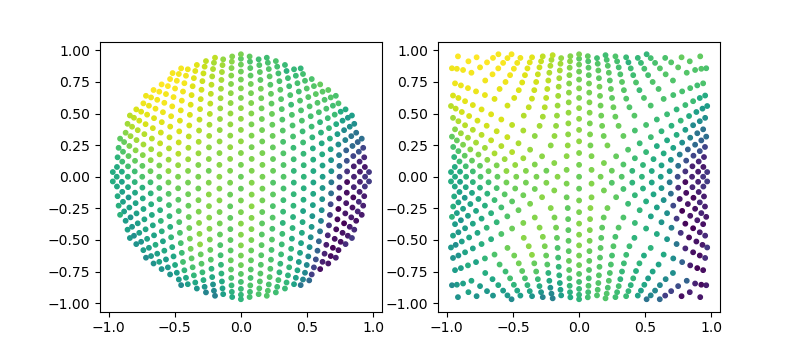

In [65]:
# here is transform R1 output io a square
#square = np.asarray(Image.open('some-square-image.jpg'))  
def circle_to_square_ellipitical(u, v):
    x = 0.5 * np.sqrt(2 + u**2 - v**2 + 2 * np.sqrt(2)*u) - 0.5 * np.sqrt(2 + u**2 - v**2 - 2 * np.sqrt(2)*u)
    y = 0.5 * np.sqrt(2 - u**2 + v**2 + 2 * np.sqrt(2) * v) - 0.5 * np.sqrt(2 - u**2 + v**2 - 2 * np.sqrt(2) * v)
    return x, y

def circle_to_square_fg(u, v):
    if np.abs(u) < 1e-5 or np.abs(v) < 1e-5:
        return u, v
    else:
        square_add = u**2 + v**2
        under_sqrt = square_add - np.sqrt((square_add)*(square_add - 4 * u**2 * v**2))
        x = np.sign(u*v) * np.sqrt(under_sqrt)/(v* np.sqrt(2))
        y = np.sign(u*v) * np.sqrt(under_sqrt)/(u* np.sqrt(2))
        return x, y
    
def circle_to_square_stretching(u, v):
    #if np.abs(u) < 1e-5 or np.abs(v) < 1e-5:
        #return u, v
    
    square_add = u**2 + v**2
    if u **2 >= v**2:
        x = np.sign(u) * np.sqrt(square_add)
        y = np.sign(u) * v * np.sqrt(square_add)/u
    else:
        x = np.sign(v) * u * np.sqrt(square_add)/v
        y = np.sign(v) * np.sqrt(square_add)
    return x, y
    
frame_number = 50
#x1_square, z1_square = circle_to_square_ellipitical(x1, z1)

x1_square = []
z1_square = []
for i in range(len(x1)):
    x1_temp, z1_temp = circle_to_square_stretching(x1[i], z1[i])
    #x1_temp, z1_temp = circle_to_square_fg(x1[i], z1[i])
    x1_square.append(x1_temp)
    z1_square.append(z1_temp)

#x1_square, z1_square = circle_to_square_stretching(x1, z1)
#fig = plt.figure()
fig = plt.figure(figsize=(8, 3.5))
ax_R1_square = fig.add_subplot(1, 2, 2)
ax_R1_output = fig.add_subplot(1, 2, 1)

ax_R1_square.scatter(x1_square, z1_square, c=R1_outputs[frame_number, :], s=10)
ax_R1_output.scatter(x1,z1, c=R1_outputs[frame_number, :], s=10 )
plt.show()


In [68]:
print(np.max(x1))
print(np.max(z1))
print('some length')
print(len(x1), len(y1), len(z1))
print(len(np.unique(np.array(x1_square).round(decimals=2))))
print(len(np.unique(np.array(z1_square).round(decimals=2))))

0.9678154093971983
0.9685320443783233
some length
611 611 611
151
157


theta range is 3.141592653589793 ~ -3.103121626182465
phi range is 1.3192634525684666 ~ 0.0


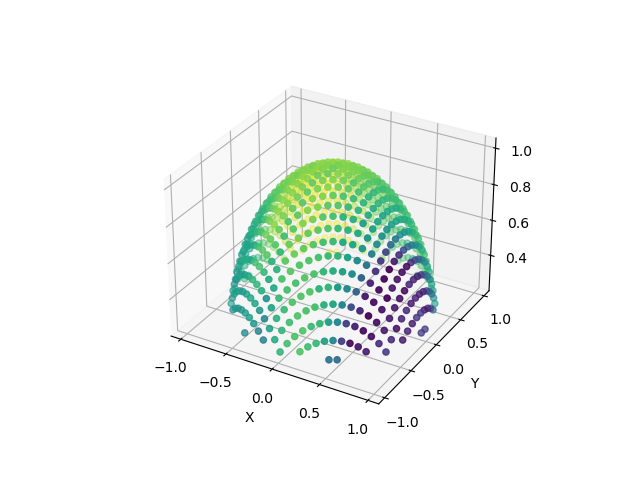

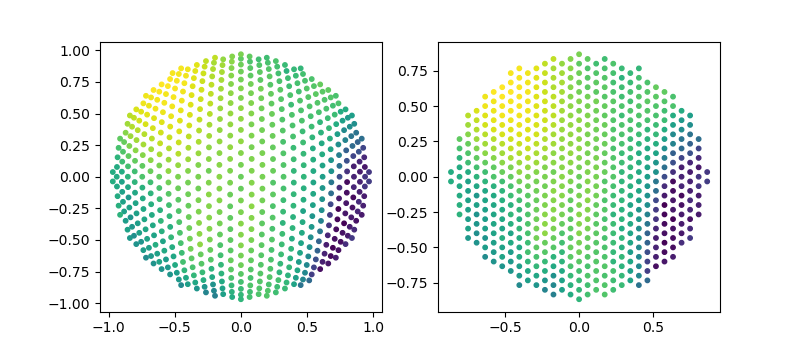

In [4]:
#emmm hey, I think we should first do Albers projection to the 2d plane
#but first thing first, transform the cartisian coordinate to sphere coordinate
def cartisian_to_sphere(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y,x)
    phi = np.arccos(z)
    return r, theta, phi

#r, theta, phi = cartisian_to_sphere(x1, y1,z1)
r, theta, phi = cartisian_to_sphere(x1, z1,-y1)
print(f'theta range is {np.max(theta)} ~ { np.min(theta)}')
print(f'phi range is {np.max(phi)} ~ {np.min(phi)}')

frame_number = 50
X = r * np.sin(phi) * np.cos(theta)
Y = r * np.sin(phi) * np.sin(theta)
Z = r * np.cos(phi)
fig = plt.figure()
ax = fig.add_subplot(1,1, 1, projection = '3d')
plot = ax.scatter(X, Y, Z, c=R1_outputs[frame_number, :])
#print(np.sin(phi))
#plot = ax.scatter(x1, y1, z1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


def albers(theta, phi):
    
    x = np.sign(np.cos(theta)) * np.sqrt((1-np.cos(phi))/(1 + np.tan(theta)**2))
    y =  x * np.tan(theta)
    return x, y

x_hexa, y_hexa = albers(theta, phi)


fig = plt.figure(figsize=(8, 3.5))
ax_R1_square = fig.add_subplot(1, 2, 2)
ax_R1_output = fig.add_subplot(1, 2, 1)

cut_num = 30
ax_R1_square.scatter(x_hexa, y_hexa, c=R1_outputs[frame_number, :], s=10)
ax_R1_output.scatter(x1,z1, c=R1_outputs[frame_number, :], s=10 )
plt.show()


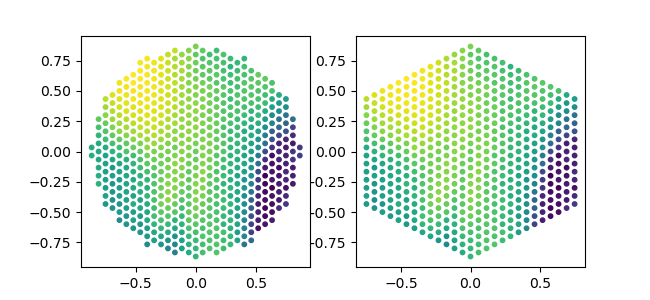

0.7505553499465136
0.8666666666666668


In [5]:
# the index of R1
cut_num = 64
#cut_num = 215
#cut_num = 50
x_hexa, y_hexa = albers(theta, phi)


fig = plt.figure(figsize=(6.5, 3))
ax_R1_hexa_cut = fig.add_subplot(1, 2, 2)
ax_R1_hexa = fig.add_subplot(1, 2, 1)


ax_R1_hexa.scatter(x_hexa, y_hexa, c=R1_outputs[frame_number, :], s=10)
ax_R1_hexa_cut.scatter(x_hexa[:-cut_num], y_hexa[:-cut_num], c=R1_outputs[frame_number, :-cut_num], s=10)
plt.show()

# let's see the range of hexagon
print((np.max(x_hexa[:-cut_num]) - np.min(x_hexa[:-cut_num]))/2)
print((np.max(y_hexa[:-cut_num]) - np.min(y_hexa[:-cut_num]))/2)

(0.5, 0.7889999999999999)


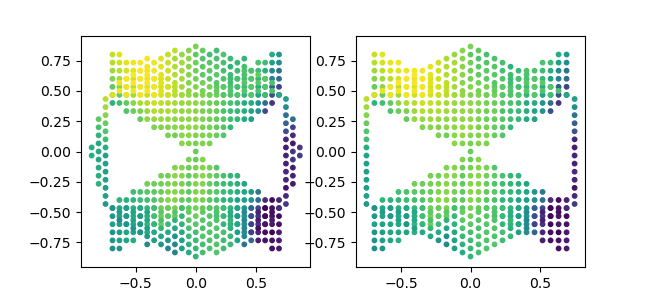

In [8]:
def hexagon_to_square_stretch(u, v):
    hexa_r = 1
    if u**2 <= v**2 :
        y = np.sign(v)* hexa_r
        x = (u/v)*hexa_r
    else:
        x = np.sign(u) * np.sqrt(3) * hexa_r / 2
        y = 1
        
def hexagon_to_square_simple(u, v):
    a1 = 0.867
    a2 = 0.75
    l = a1 * abs(u)  / (2 * a2)
    x = u
    y = v + np.sign(v) * l
    return x, y

def hexagon_to_square_matrix(u, v):
    a1 = 0.867
    a2 = 0.75
    if (abs(u) < a2) and (abs(v) < a1/2):
        l = a1 * abs(u)  / (2 * a2)
        y = v + np.sign(v) * l
    else:
        y = v
        
    x = u
    return x, y

print(hexagon_to_square_simple(0.5, 0.5))

x_square = []
y_square = []
for i in range(len(x_hexa)):
    x1_temp, z1_temp = hexagon_to_square_matrix(x_hexa[i], y_hexa[i])
    #x1_temp, z1_temp = circle_to_square_fg(x1[i], z1[i])
    x_square.append(x1_temp)
    y_square.append(z1_temp)


cut_num = 64

fig = plt.figure(figsize=(6.5, 3))
ax_R1_square = fig.add_subplot(1, 2, 1)
ax_R1_square_cut = fig.add_subplot(1, 2, 2)


ax_R1_square.scatter(x_square, y_square, c=R1_outputs[frame_number, :], s=10)
ax_R1_square_cut.scatter(x_square[:-cut_num], y_square[:-cut_num], c=R1_outputs[frame_number, :-cut_num], s=10)
plt.show()



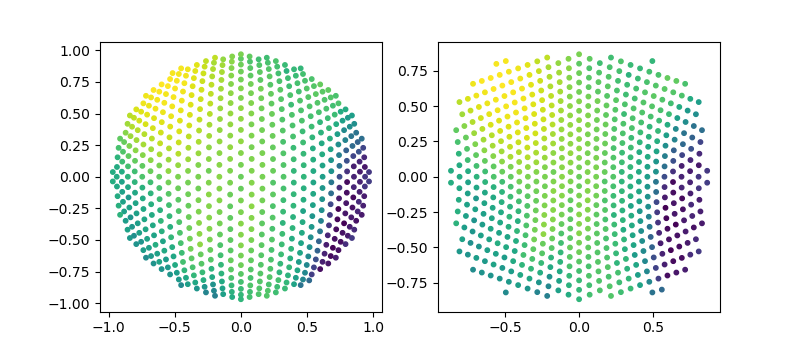

In [48]:
def circle_to_square_ellipitical(u, v):
    x = 0.5 * np.sqrt(2 + u**2 - v**2 + 2 * np.sqrt(2)*u) - 0.5 * np.sqrt(2 + u**2 - v**2 - 2 * np.sqrt(2)*u)
    y = 0.5 * np.sqrt(2 - u**2 + v**2 + 2 * np.sqrt(2) * v) - 0.5 * np.sqrt(2 - u**2 + v**2 - 2 * np.sqrt(2) * v)
    return x, y

def circle_to_square_fg(u, v):
    if np.abs(u) < 1e-5 or np.abs(v) < 1e-5:
        return u, v
    else:
        square_add = u**2 + v**2
        under_sqrt = square_add - np.sqrt((square_add)*(square_add - 4 * u**2 * v**2))
        x = np.sign(u*v) * np.sqrt(under_sqrt)/(v* np.sqrt(2))
        y = np.sign(u*v) * np.sqrt(under_sqrt)/(u* np.sqrt(2))
        return x, y
    
def circle_to_square_stretching(u, v):
    #if np.abs(u) < 1e-5 or np.abs(v) < 1e-5:
        #return u, v
    
    square_add = u**2 + v**2
    if u **2 >= v**2:
        x = np.sign(u) * np.sqrt(square_add)
        y = np.sign(u) * v * np.sqrt(square_add)/u
    else:
        x = np.sign(v) * u * np.sqrt(square_add)/v
        y = np.sign(v) * np.sqrt(square_add)
    return x, y
    
frame_number = 50
x1_square, z1_square = circle_to_square_ellipitical(x_hexa, y_hexa)
'''
x1_square = []
z1_square = []
for i in range(len(x1)):
    x1_temp, z1_temp = circle_to_square_stretching(x_hexa[i], y_hexa[i])
    #x1_temp, z1_temp = circle_to_square_fg(x_hexa[i], y_hexa[i])
    x1_square.append(x1_temp)
    z1_square.append(z1_temp)
'''
#x1_square, z1_square = circle_to_square_stretching(x1, z1)
#fig = plt.figure()
fig = plt.figure(figsize=(8, 3.5))
ax_R1_square = fig.add_subplot(1, 2, 2)
ax_R1_output = fig.add_subplot(1, 2, 1)

ax_R1_square.scatter(x1_square, z1_square, c=R1_outputs[frame_number, :], s=10)
ax_R1_output.scatter(x1,z1, c=R1_outputs[frame_number, :], s=10 )
plt.show()

In [19]:
x = [1, 2, 3, 4, 5,6 ,7]
print(x[::-1])

[7, 6, 5, 4, 3, 2, 1]
now is 250th frame
now is 0th frame
now is 0th frame
now is 100th frame
now is 300th frame
now is 50th frame
now is 150th frame
now is 350th frame
now is 100th frame
